# Polynomial Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('employee_salary_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Emp_Age             3000 non-null   int64
 1   Emp_Exp             3000 non-null   int64
 2   Emp_Current_Salary  3000 non-null   int64
 3   Emp_Rating          3000 non-null   int64
 4   Emp_New_Salary      3000 non-null   int64
dtypes: int64(5)
memory usage: 117.3 KB


In [6]:
df.head()

,Emp_Age,Emp_Exp,Emp_Current_Salary,Emp_Rating,Emp_New_Salary
0,59,35,106712,4,347494
1,49,24,81961,5,350586
2,35,14,52415,2,88679
3,28,3,31809,1,43998
4,41,17,60501,4,200387


In [7]:
#EDA

<Axes: >

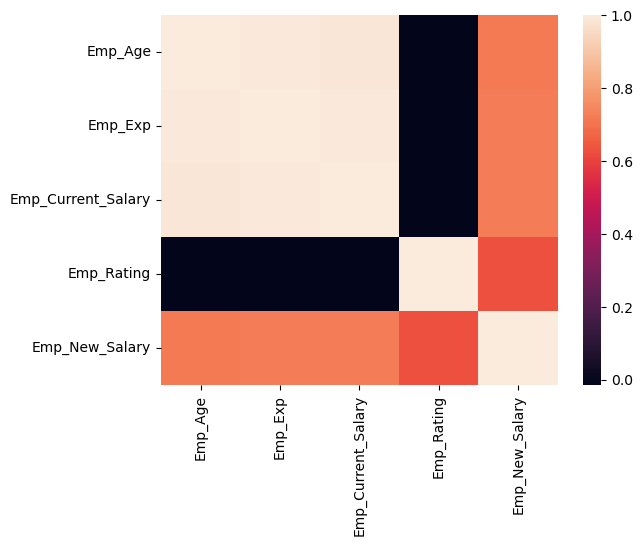

In [8]:
sns.heatmap(df.corr())

In [9]:
df.columns

Index(['Emp_Age', 'Emp_Exp', 'Emp_Current_Salary', 'Emp_Rating',
       'Emp_New_Salary'],
      dtype='object')

<Axes: xlabel='Emp_Current_Salary', ylabel='Emp_New_Salary'>

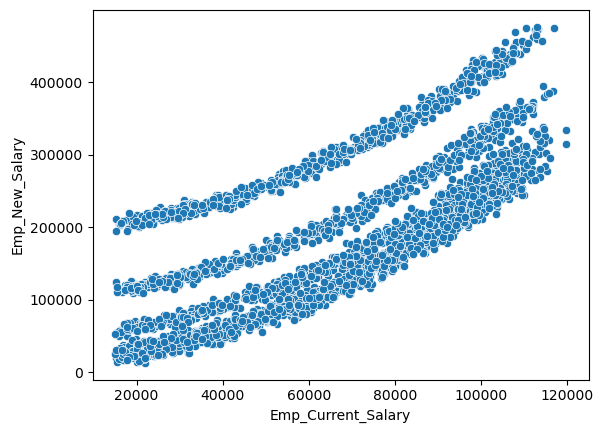

In [10]:
sns.scatterplot(df,x='Emp_Current_Salary',y='Emp_New_Salary')

<Axes: xlabel='Emp_Exp', ylabel='Emp_New_Salary'>

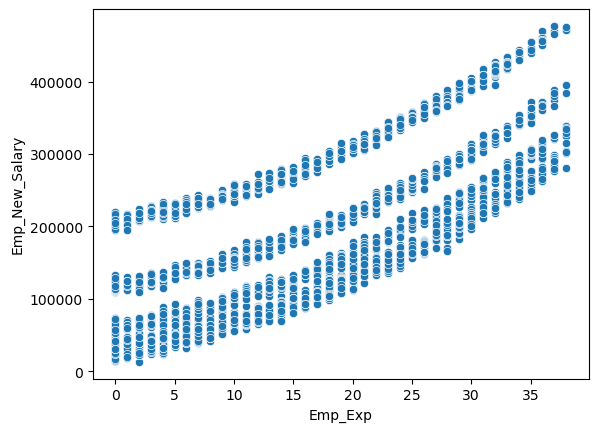

In [11]:
sns.scatterplot(df,x='Emp_Exp',y='Emp_New_Salary')

<Axes: xlabel='Emp_Age', ylabel='Emp_New_Salary'>

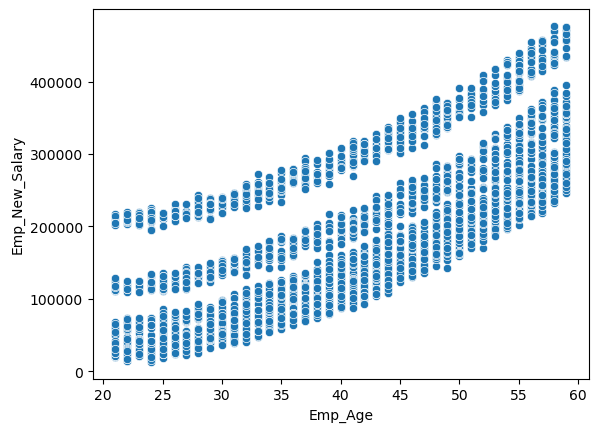

In [12]:
sns.scatterplot(df,x='Emp_Age',y='Emp_New_Salary')

<Axes: xlabel='Emp_Rating', ylabel='Emp_New_Salary'>

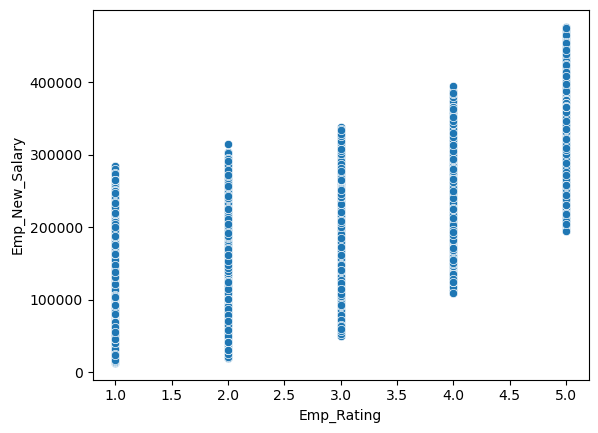

In [13]:
sns.scatterplot(df,x='Emp_Rating',y='Emp_New_Salary')

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

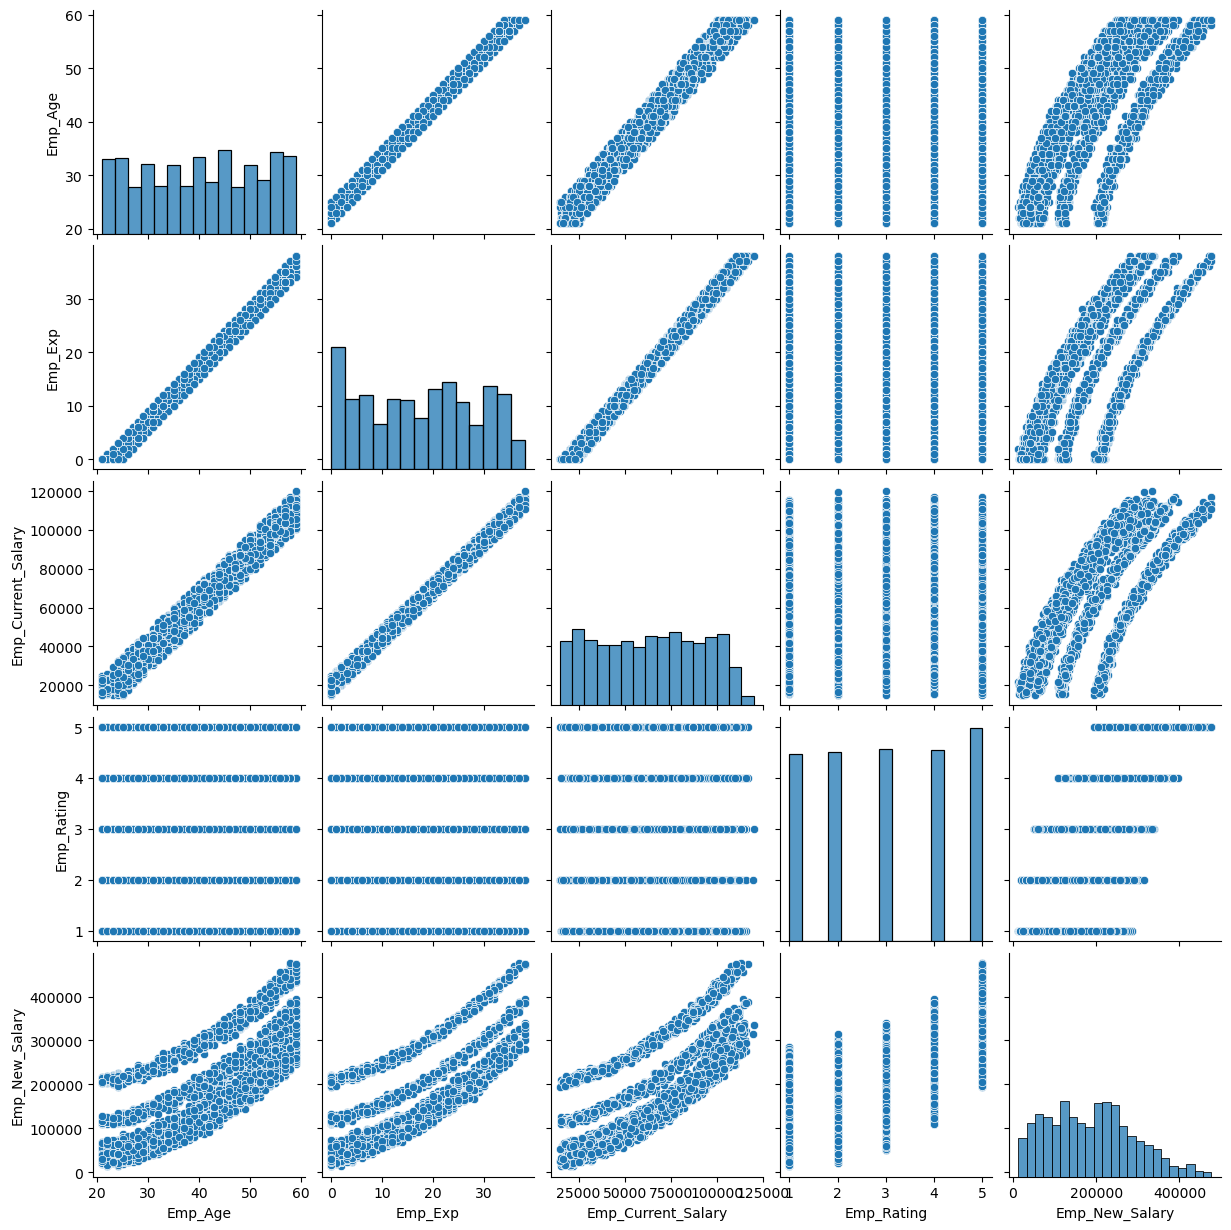

In [14]:
sns.pairplot(df)

In [15]:
df.head()

,Emp_Age,Emp_Exp,Emp_Current_Salary,Emp_Rating,Emp_New_Salary
0,59,35,106712,4,347494
1,49,24,81961,5,350586
2,35,14,52415,2,88679
3,28,3,31809,1,43998
4,41,17,60501,4,200387


In [16]:
#data preprocessing

In [17]:
x=df.drop('Emp_New_Salary',axis=1)

In [18]:
x.head()

,Emp_Age,Emp_Exp,Emp_Current_Salary,Emp_Rating
0,59,35,106712,4
1,49,24,81961,5
2,35,14,52415,2
3,28,3,31809,1
4,41,17,60501,4


In [19]:
y=df['Emp_New_Salary']

In [20]:
y.head()

0    347494
1    350586
2     88679
3     43998
4    200387
Name: Emp_New_Salary, dtype: int64

In [21]:
#generate poly features

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)

In [24]:
#4 features -->poly features - 'Emp_Age', 'Emp_Exp', 'Emp_Current_Salary', 'Emp_Rating'
x_poly_features=poly_features.fit_transform(x)

In [25]:
x.shape

(3000, 4)

In [27]:
x_poly_features.shape
#n=4, d=3
#4 --> 34

(3000, 14)

In [28]:
#Data splitting

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_poly_features,y,test_size=0.3,random_state=101)

In [33]:
x_train.shape,y_train.shape

((2100, 14), (2100,))

In [34]:
x_test.shape,y_test.shape

((900, 14), (900,))

In [35]:
#Train the model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
#evaluation

In [43]:
y_pred=model.predict(x_test)
y_pred[0:5]

array([ 38501.60242866, 168306.79523958, 127896.94065934,  69173.3380819 ,
       280365.62328831])

In [44]:
y_test[0:5]

45       42543
668     178043
1650    118002
1247     66999
18      278843
Name: Emp_New_Salary, dtype: int64

In [45]:
model.coef_

array([ 7.46001318e+03, -8.23738614e+03,  1.42734336e+00, -3.40557522e+04,
       -1.42752684e+02,  3.49857400e+02, -2.82919745e-02, -2.93443675e+01,
       -2.90476525e+01, -1.60301917e-02,  9.95901506e+01,  8.26260610e-06,
       -2.46942064e-02,  1.34604381e+04])

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mean_absolute_error(y_test,y_pred)

4418.822814053402

In [49]:
mean_squared_error(y_test,y_pred)

30111228.80176657

In [51]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

5487.369934838234

In [52]:
y.mean()

188868.19866666666

In [53]:
#evaluating residuals

In [56]:
residuals=y_test-y_pred
residuals[0:5]

45      4041.397571
668     9736.204760
1650   -9894.940659
1247   -2174.338082
18     -1522.623288
Name: Emp_New_Salary, dtype: float64

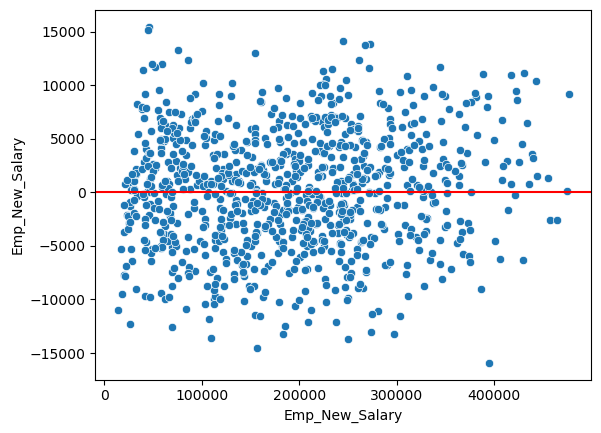

In [59]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='red')

In [60]:
#bias-variance trade-off

In [61]:
##training and testing

In [80]:
train_rmse_errors = []
test_rmse_errors = []

for poly_deg in range(1,20):
    poly_features = PolynomialFeatures(degree=poly_deg,include_bias=False)
    x_poly_features = poly_features.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_poly_features,y, test_size=0.3, random_state=101)
    model.fit(x_train,y_train)

    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluation
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append RMSE
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [81]:
train_rmse_errors

[26756.108737567163,
 5513.504866144227,
 16599.21523119578,
 29645.137117187307,
 38181.72064466854,
 43883.73476974492,
 48145.98350331827,
 51647.47248515126,
 54700.99192845883,
 57454.39260647049,
 59975.74466887561,
 62293.26645608966,
 64418.55934500431,
 66360.45083611432,
 68130.76004586482,
 69745.21323901422,
 71221.90630836118,
 73611.3112398276,
 74870.97591061772]

In [82]:
test_rmse_errors

[26474.456831074905,
 5487.369934838234,
 15935.035706968105,
 28919.146044445795,
 38006.21811454702,
 44100.88205442024,
 48569.89844606028,
 52177.715016764356,
 55304.76046119619,
 58141.43784135324,
 60783.22659098884,
 63273.76335237032,
 65633.3567643595,
 67859.7462936484,
 69951.91215445321,
 71907.75564756624,
 73731.28571713637,
 76185.05034070603,
 77673.23438895785]

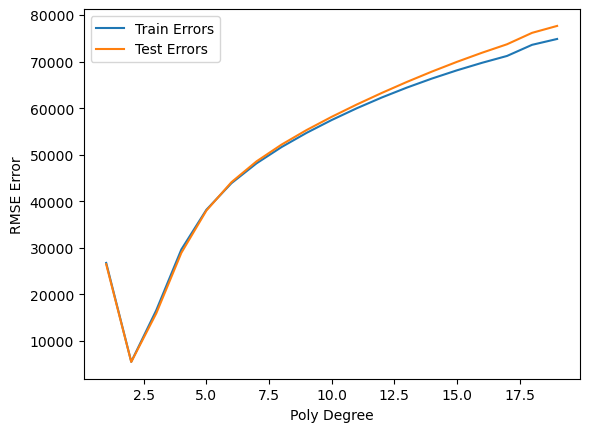

In [84]:
plt.plot(range(1,20),train_rmse_errors,label='Train Errors')
plt.plot(range(1,20),test_rmse_errors,label='Test Errors')

plt.xlabel('Poly Degree')
plt.ylabel('RMSE Error')

plt.legend()